In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [ ]:
path = "http://www.iam.fmph.uniba.sk/ospm/Rosa/PDV/01_nhanes-weight.xls"
#path = "01_nhanes-weight.xls"
data = pd.ExcelFile(path).parse('Sheet1')
data["Age"] = data["Age"]/12
data = data.dropna()

data

Gender        Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  \
0          0  20.083333    64.7     163        34.2        36.2        29.0   
1          0  20.083333    54.0     153        37.2        34.0        26.1   
2          1  20.083333    61.4     165        37.7        35.0        31.4   
3          0  20.083333    74.0     171        37.9        36.2        29.8   
4          0  20.083333    63.6     159        38.1        34.0        29.2   
...      ...        ...     ...     ...         ...         ...         ...   
4974       1  79.833333    89.5     184        43.0        42.8        32.2   
4975       0  79.916667    78.6     151        35.6        34.2        33.5   
4976       1  79.916667    86.5     175        38.6        41.5        32.8   
4977       0  79.916667    58.0     163        40.2        37.5        26.2   
4978       1  79.916667    76.2     168        40.8        39.5        29.8   

      Waist  
0      89.6  
1      85.5  
2      70.1  
3      91.1  
4      74.3  
...     ...  
4974  112.8  
4975  114.9  
4976  100.2  
4977   82.8  
4978  103.5  

[4978 rows x 8 columns]

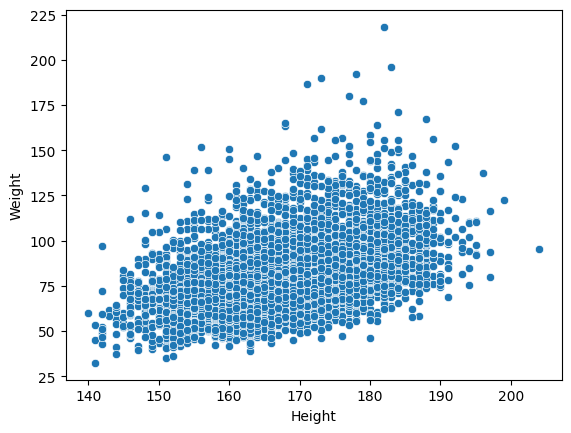

In [ ]:
# Priamkova regresia
# Weight ~ a + b * Height

# Vykreslenie dat
sns.scatterplot(x='Height', y='Weight', data=data)
plt.show()

In [ ]:
X = np.array(data["Height"]).reshape((-1, 1)) # reshape... LinearRegression vyzaduje maticu X-ov
Y = data["Weight"]

X

array([[163],
       [153],
       [165],
       ...,
       [175],
       [163],
       [168]])

In [ ]:
lm = LinearRegression()
lm.fit(X, Y)
# intercept si prida automaticky

# Parametre
lm.intercept_, lm.coef_

(-68.83176566805159, array([0.89644869]))

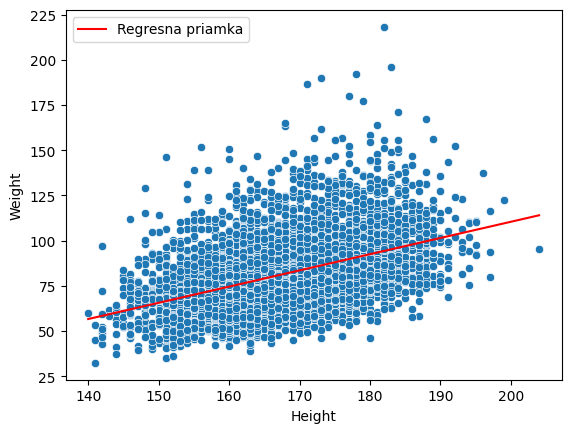

In [ ]:
sns.scatterplot(x='Height', y='Weight', data=data)

# dokreslenie regresnej priamky
a = lm.intercept_
b = lm.coef_
x_line = [min(data['Height']), max(data['Height'])]
y_line = [a + b * xi for xi in x_line]

plt.plot(x_line, y_line, color='red', label='Regresna priamka')
plt.legend()
plt.show()

In [ ]:
# Weight vs. vsetky ostatne

# vysvetlujuce bez Gender
X = data.copy(deep=True)
X.drop(labels="Gender",axis=1,inplace=True)
X.drop(labels="Weight",axis=1,inplace=True)
X

Age  Height  Leg_Length  Arm_Length  Arm_circum  Waist
0     20.083333     163        34.2        36.2        29.0   89.6
1     20.083333     153        37.2        34.0        26.1   85.5
2     20.083333     165        37.7        35.0        31.4   70.1
3     20.083333     171        37.9        36.2        29.8   91.1
4     20.083333     159        38.1        34.0        29.2   74.3
...         ...     ...         ...         ...         ...    ...
4974  79.833333     184        43.0        42.8        32.2  112.8
4975  79.916667     151        35.6        34.2        33.5  114.9
4976  79.916667     175        38.6        41.5        32.8  100.2
4977  79.916667     163        40.2        37.5        26.2   82.8
4978  79.916667     168        40.8        39.5        29.8  103.5

[4978 rows x 6 columns]

In [ ]:
lm = LinearRegression()
lm.fit(X, Y)

# vypisanie parametrov ... da sa krajsie?
names = np.append("intercept", np.array(list(X.columns)))
pd.Series(np.append(lm.intercept_, lm.coef_), index=names)


intercept    -117.836408
Age            -0.097700
Height          0.468451
Leg_Length      0.183715
Arm_Length     -0.109532
Arm_circum      1.536749
Waist           0.724694
dtype: float64

In [ ]:
# Novi "nahodni" ludia
# ... mozete vyskusat svoje udaje
X_new = pd.DataFrame({
    "Age": random.choices(data["Age"], k=5),
    "Height":random.choices(data["Height"], k=5),
    "Leg_Length":random.choices(data["Leg_Length"], k=5),
    "Arm_Length":random.choices(data["Arm_Length"], k=5),
    "Arm_circum":random.choices(data["Arm_circum"], k=5),
    "Waist":random.choices(data["Waist"], k=5)})

X_new

Age  Height  Leg_Length  Arm_Length  Arm_circum  Waist
0  27.000000     166        26.1        36.6        31.3   88.9
1  56.166667     159        34.2        34.5        29.8   80.0
2  41.666667     185        36.2        37.5        32.6  110.7
3  63.583333     159        43.1        38.5        34.0  117.2
4  61.750000     178        40.5        40.6        26.3   93.3

In [ ]:
# Predikcie
lm.predict(X_new)

array([70.60028322, 57.43476244, 97.62098554, 91.32006631, 70.53892065])

In [ ]:
# Standardizacia dat
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_scaled

array([[-1.74246598, -0.45830186, -1.02369265, -0.46467205, -0.83299215,
        -0.5829174 ],
       [-1.74246598, -1.45503682, -0.27977761, -1.26373345, -1.41548344,
        -0.84190015],
       [-1.74246598, -0.25895487, -0.15579177, -0.90052373, -0.3509304 ,
        -1.81466465],
       ...,
       [ 1.89909511,  0.7377801 ,  0.06738274,  1.46033951, -0.06972771,
         0.08664777],
       [ 1.89909511, -0.45830186,  0.46413743,  0.00750059, -1.39539753,
        -1.01244977],
       [ 1.89909511,  0.04006562,  0.61292044,  0.73392005, -0.6723049 ,
         0.29509731]])

In [ ]:
# kontrola 1
X_scaled.mean(axis=0)

array([ 1.82702833e-16, -7.93615430e-16,  1.37027125e-15, -1.89554189e-15,
       -4.73885473e-16, -1.14189271e-16])

In [ ]:
# kontrola 2
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [ ]:
# Regresia na standardizovanych datach
lm_scaled = LinearRegression()
lm_scaled.fit(X_scaled, Y)

# vypisanie parametrov
names = np.append("intercept", np.array(list(X.columns)))
pd.Series(np.append(lm_scaled.intercept_, lm_scaled.coef_), index=names)

intercept     81.411270
Age           -1.605271
Height         4.699859
Leg_Length     0.740872
Arm_Length    -0.301567
Arm_circum     7.650882
Waist         11.472757
dtype: float64

In [ ]:
# Predikcie z noveho modelu
lm_scaled.predict(X_new)
# nonsens... preco?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([2085.9456674 , 1899.27675692, 2418.9626727 , 2351.67877663,
       2108.24883208])

In [ ]:
# ta ista transformacia na X_new
X_new_scaled = scaler.transform(X_new)

In [ ]:
# X_new_scaled uz nebude "standardizovane"
X_new_scaled.mean(axis=0), X_new_scaled.std(axis=0)

(array([ 0.08034329,  0.17960852, -0.57238419,  0.02202898, -0.47144584,
        -0.05105525]),
 array([0.8429016 , 1.04081277, 1.45417156, 0.73386344, 0.53127127,
        0.87472662]))

In [ ]:
# Opravene predikcie
lm_scaled.predict(X_new_scaled)

array([70.60028322, 57.43476244, 97.62098554, 91.32006631, 70.53892065])

In [ ]:
# Predikcie z povodneho modelu
lm.predict(X_new)
# to iste!

array([70.60028322, 57.43476244, 97.62098554, 91.32006631, 70.53892065])